## CRISM Image Preprocessing
	1. Download data and preprocess in CAT ENVI: Convert PDS to CAT (and if needed, rotate data). 
    2. Layer "l" and "s" image files using preprocessing/layer_CRISM_data.py (which also gets rid of NULL values); and save as Pickle.
	3.  Reduce wavelengths to match CRISM & USGS. 
    4. Recalculate k-values (if wavelengths have changed from previous)



Layer "l" and "s" image files using preprocessing/layer_CRISM_data.py (which also gets rid of NULL values); and save as Pickle.


In [1]:
from preprocessing.CRISM_preprocess_helpers import *
from utils.plotting import *
from utils.constants import *
import pandas as pd

PIX_DIR = "/Users/marina/mars_data/bagnolddunes/pixels/"
CRISM_DATA_DIR = "/Users/marina/mars_data/bagnolddunes/mrocr_2102/trdr/2008/2008_202/hrl0000baba/"
USE_DIR = DATA_DIR + 'PREPROCESSED_DATA/'

CUR_IMG_NAME = "hrl0000baba"

In [ ]:


# Save img to ../data/PREPROCESSED_DATA/
record_layered_data(img_dir=CRISM_DATA_DIR, 
                    pixel_dir=PIX_DIR, 
                    img_save_name=CUR_IMG_NAME)

Reduced wavelengths: RW_CRISM and RW_USGS


In [ ]:
record_reduced_spectra()

Recalculate k-values

In [ ]:
from preprocessing.estimatek import estimate_all_USGS_k
estimate_all_USGS_k()

### Optional
Identify subsection of image to use for testing

/Users/marina/Documents/PhD/research/mars_research/code/environments/spec_env/lib/python3.9/site-packages/spectral/graphics/spypylab.py:58: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams['keymap.all_axes'] = ''


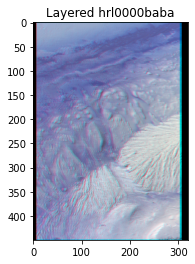

In [3]:

img =  USE_DIR + CUR_IMG_NAME + ".pickle"
with open(img, 'rb') as handle:
    loaded_img = pickle.load(handle)
view = imshow(loaded_img, bands= (200, 71, 18), title="Layered " + CUR_IMG_NAME)

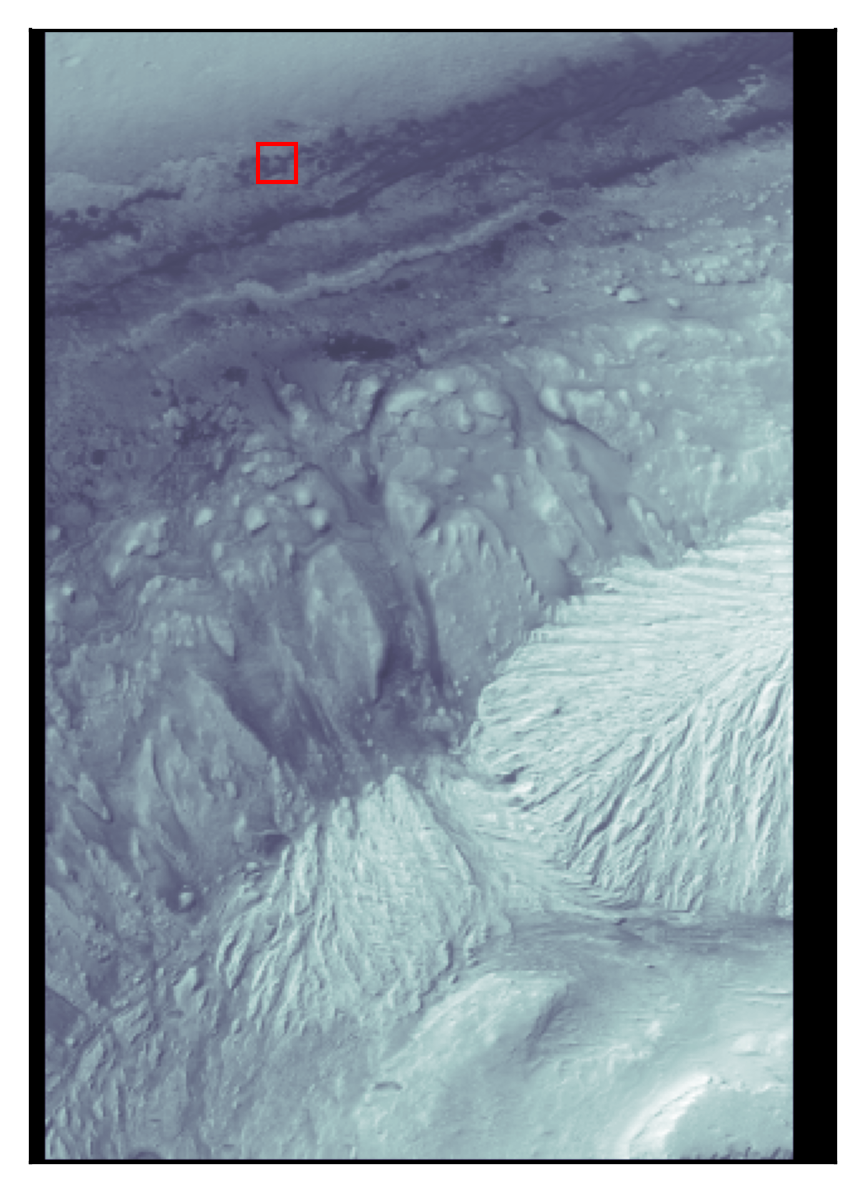

In [4]:

xstart = 90
xend = 105
ystart = 45
yend = 60

coords = [xstart, xend, ystart, yend]

# For plotting below, X corresponds to columns

plot_zoomed_sectioned_CRISM(loaded_img, coords, "gobabeb")

# Save called-out section.
with open(USE_DIR + "gobabeb.pickle", 'wb') as f:
    pickle.dump(loaded_img[xstart:xend,ystart:yend,:], f)

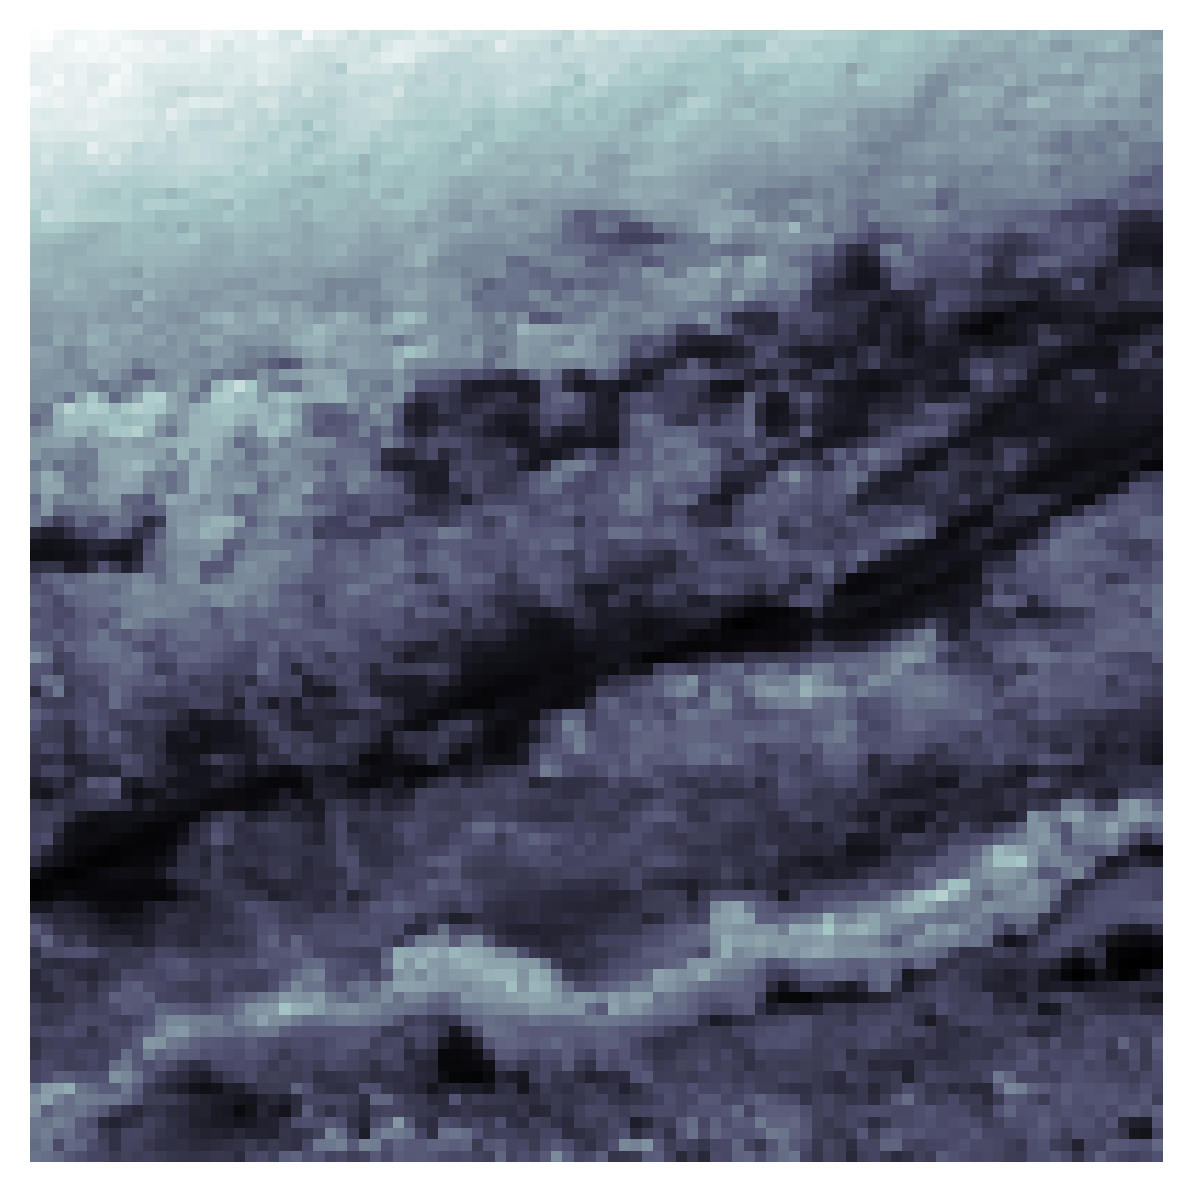

In [5]:
with open(USE_DIR + "img_subsection.pickle", 'rb') as handle:
    small_img = pickle.load(handle)
    
coords = [1, 75, 1, 95]

# plot_zoomed_sectioned_CRISM(small_img, coords, "particularROI")
plot_CRISM_img(small_img, "ROI")